In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)

def rgba(color, alpha):
    return mpl.colors.to_rgba(color, alpha)

def obsbiaslab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = '$\\mathrm{b}_{%s-%s} (%s) = \\sqrt{\\mathrm{P}_{%s} (%s) / \mathrm{P}_{%s} (%s)}$'%(name1, name2,fn, name1, fn, name2, fn)
    return out

def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)
siteFG()
from figrid.data_sort import DataSort
from figrid.data_container import DataContainer
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = '$k$ (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
OBSBIAS = r"b$_{\mathrm{HI, opt}}$ (k) = $\sqrt{\rm{P}_{\rm{HI}} (\rm{k}) / \rm{P}_{\mathrm{opt}} (k)}$"
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, fontsize = 14, slc = (-1, -1))
ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.plotArgs('HI_fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('HI_fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('HI_fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


In [3]:
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'space':'real', 'mas':'CICW', 'path':'fiducial'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':'no key found', 'mas':'CICW', 'color': 'resolved',
      'space':'real', 'fieldname':'galaxy',
     'path':'fiducial'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    ptlip['snapshot'] = s
    galip['snapshot'] = s
    
    ptls = ds.getMatching(ptlip)
    gals = ds.getMatching(galip)
    xdata = ptls[0].getData()[0]
    ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
    ydata = np.sqrt(ydata)
    dc = DataContainer([xdata, ydata])
    dc.update(ptlip)
    dc.update(galip)
    dc.add('post_process', 'obs_bias')
    dc.add('is_auto', False)
    dc.add('denominator', 'ptl')
    dc.add('numerator', 'galaxy')
    resolved_biases.append(dc)


ds.extend(resolved_biases)
    

# HI-galaxy Obs. Bias Color Comparison

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67]


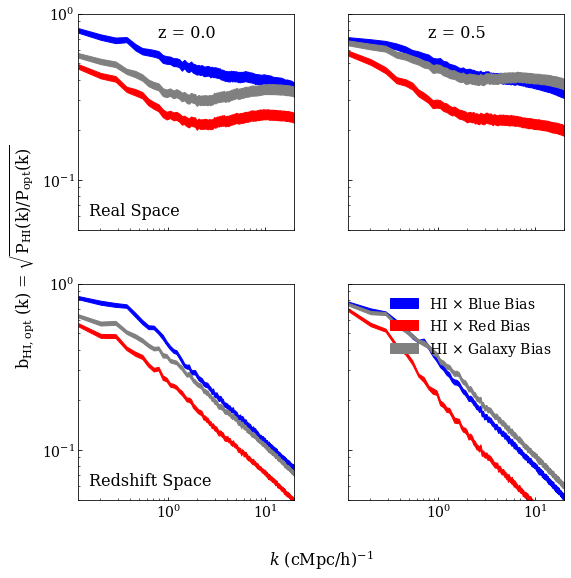

In [4]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.autoFill()


fg.setXLabel(XLAB)
fg.setYLabel(OBSBIAS)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 40, 33]


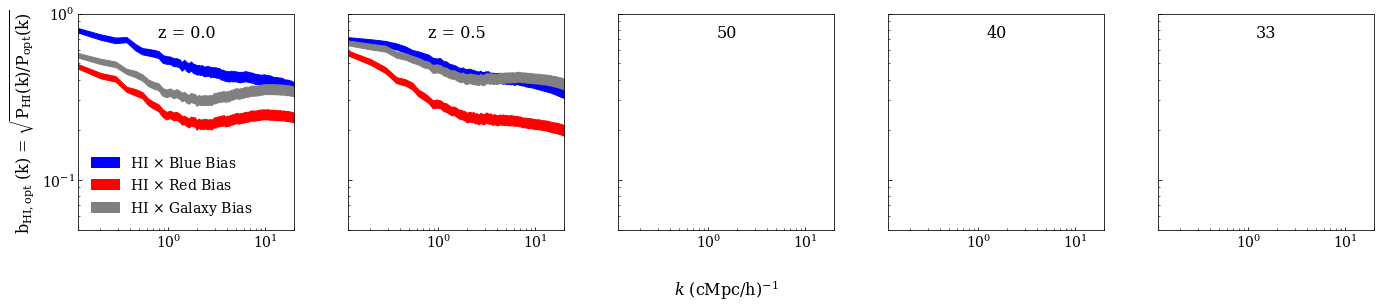

In [5]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50, 40, 33], 'space':'real',
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', '', 'snapshot', ip)
fg.autoFill()
fg.setXLabel(XLAB)
fg.setYLabel(OBSBIAS)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({'loc':'lower left'}, (0, 0))
fg.rowLabelArgs(pos = [0.5, 0.95], textKwargs = {'ha':'center', 'va':'top', 'fontsize':16})
fg.plot()
# fg.save('HI-galaxy_bias_color_snapshotR.png')
# fg.save(DRAFTPATH%'HI-galaxy_obsbias_color_snapshotR.pdf')

The row values for : ['no key found']
The column values for color: ['red', 'blue', 'resolved']


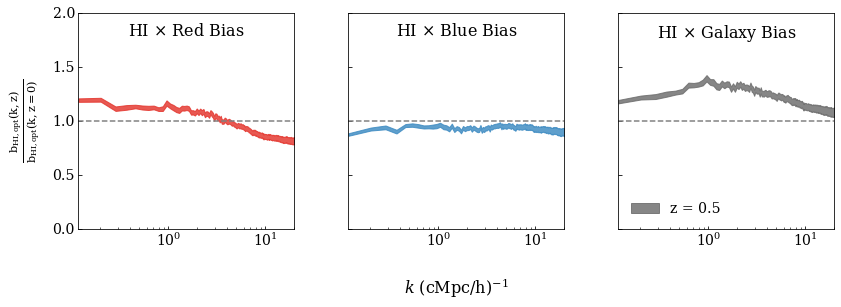

In [6]:

fg = ds.figrid('snapshot', '', 'color', ip)
fg.autoNorm(99, ['model', 'HI_fieldname'])
colors = ip['color']
snapshots = copy.copy(ip['snapshot'])
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        if not snapshots[s] == 99:
            fip = {'color':c, 'snapshot':snapshots[s]}
            fg.fill(fip, {'alpha':0.8, 'color':plotcolors[c][s]})
fg.plotArgs({'snapshot':99}, {'visible':False, 'label':'__nolegend__'})
fg.setXLabel(XLAB)
fg.setYLabel(r"$\frac{\rm{b}_{\rm{HI, opt}} (k, z)}{\rm{b}_{\rm{HI, opt}} (k, z=0)}$")
fg.setDefaultTicksParams()
fg.axisArgs({'yscale':'linear', 'ylim':(0, 2)})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.plotOnes()
fg.plot()
# fg.save("HI-galaxy_bias_snapshot_colorR_ratio.png")
# fg.save(DRAFTPATH%"HI-galaxy_bias_snapshot_colorR_ratio.pdf")

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50, 33]


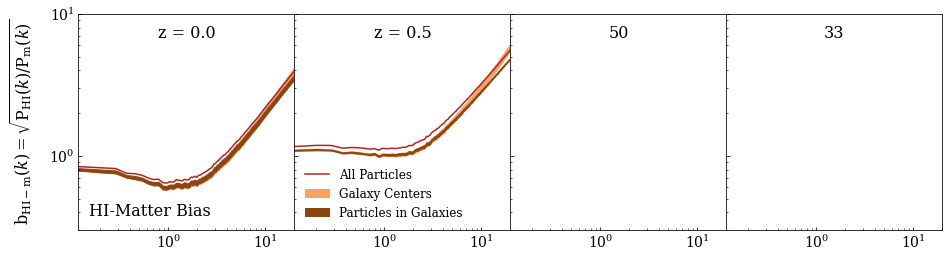

In [7]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl', 'hisubhalo'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[99, 67, 50, 33], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("HI_fieldname", 'post_process', 'snapshot', ip)
fg.autoFill()
fg.rowLabels(["HI-Matter Bias"])
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50, 33]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


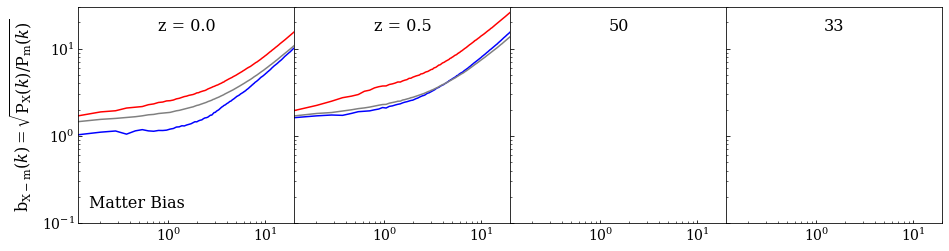

In [8]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50, 33], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)

bfg.rowLabels(["Matter Bias"])
bfg.gspecArgs(yborder = [0, 0.1], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.setYLabel(obsbiaslab("X", "m"))
bfg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 33]


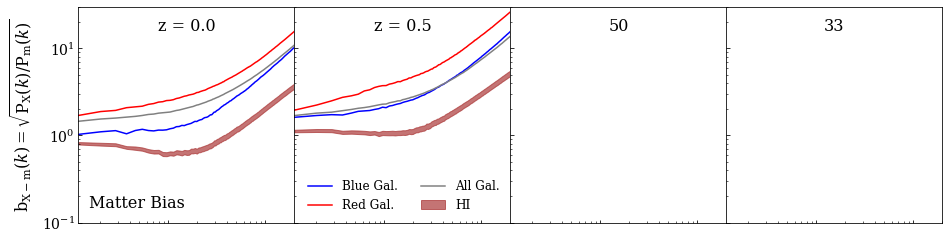

<Figure size 1097.28x287.28 with 0 Axes>

In [9]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[99, 67, 50, 33], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("post_processing", '', 'snapshot', ip)
hifg.rowLabels([""])
hifg.colLabels([""]*4)
hifg.tickArgs(labelbottom = False)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot(axes = bfg.axes)
bfg.fig

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50, 33]


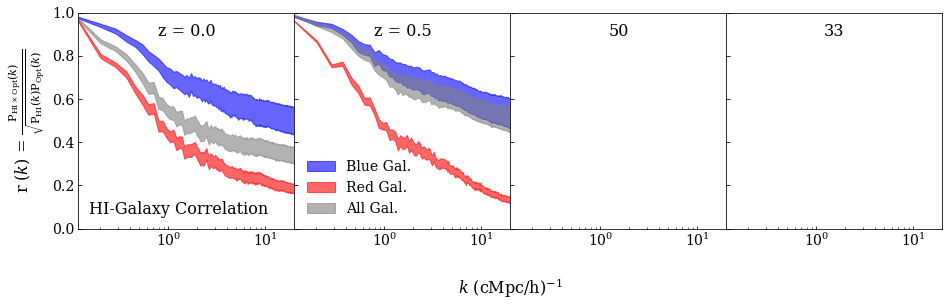

In [10]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'real',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50, 33],
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(cclab("HI", "Opt"))
ccfg.setXLabel(XLAB)
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


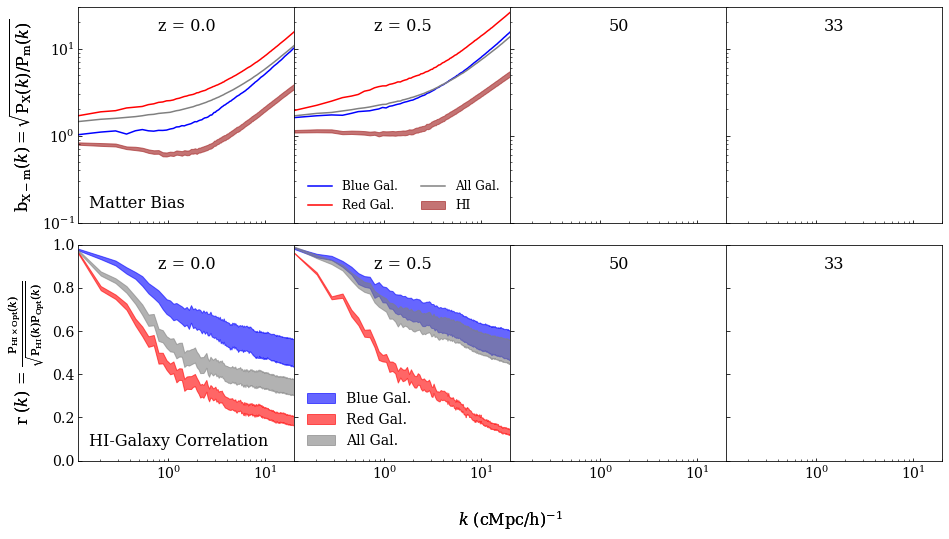

In [11]:
figarr = np.empty((2,1), dtype = object)
figarr[0,0] = bfg
figarr[1,0] = ccfg
fig = ds.combine(figarr)
hifg.plot(axes = bfg.axes)
fig.savefig("color_post_processR_snapshotC.png")
fig.savefig(DRAFTPATH%"color_post_processR_snapshotC.pdf")

# fig